In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import itertools
from collections import defaultdict

In [2]:
ted_data = pd.read_csv(r"C:\Users\Neha\Project_Files\Check_these\ted_main.csv")

In [3]:
ted_data.shape

(2550, 17)

In [4]:
ted_data.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


In [16]:
ted_data["ratings"][1]

"[{'id': 7, 'name': 'Funny', 'count': 544}, {'id': 3, 'name': 'Courageous', 'count': 139}, {'id': 2, 'name': 'Confusing', 'count': 62}, {'id': 1, 'name': 'Beautiful', 'count': 58}, {'id': 21, 'name': 'Unconvincing', 'count': 258}, {'id': 11, 'name': 'Longwinded', 'count': 113}, {'id': 8, 'name': 'Informative', 'count': 443}, {'id': 10, 'name': 'Inspiring', 'count': 413}, {'id': 22, 'name': 'Fascinating', 'count': 132}, {'id': 9, 'name': 'Ingenious', 'count': 56}, {'id': 24, 'name': 'Persuasive', 'count': 268}, {'id': 23, 'name': 'Jaw-dropping', 'count': 116}, {'id': 26, 'name': 'Obnoxious', 'count': 131}, {'id': 25, 'name': 'OK', 'count': 203}]"

In [17]:
list1 = ted_data["ratings"][1].strip('[]')
list1.strip('"')
import ast
t1 = ast.literal_eval(list1)
print(eval(list1))
type(t1)
list2 = list(t1)

({'id': 7, 'name': 'Funny', 'count': 544}, {'id': 3, 'name': 'Courageous', 'count': 139}, {'id': 2, 'name': 'Confusing', 'count': 62}, {'id': 1, 'name': 'Beautiful', 'count': 58}, {'id': 21, 'name': 'Unconvincing', 'count': 258}, {'id': 11, 'name': 'Longwinded', 'count': 113}, {'id': 8, 'name': 'Informative', 'count': 443}, {'id': 10, 'name': 'Inspiring', 'count': 413}, {'id': 22, 'name': 'Fascinating', 'count': 132}, {'id': 9, 'name': 'Ingenious', 'count': 56}, {'id': 24, 'name': 'Persuasive', 'count': 268}, {'id': 23, 'name': 'Jaw-dropping', 'count': 116}, {'id': 26, 'name': 'Obnoxious', 'count': 131}, {'id': 25, 'name': 'OK', 'count': 203})


In [18]:
for i in range(0,len(t1)):
   if t1[i]['name']=='Funny':
         print(t1[i]['count'])

544


In [19]:
len(t1)


14

In [5]:
a=[]
a = ted_data["ratings"][1].split()

In [10]:
a[:5]

["[{'id':", '7,', "'name':", "'Funny',", "'count':"]

In [22]:
import json

In [23]:
type(a)

list

In [24]:
len(a)
l = range(3,len(a),6)
m = range(5,len(a),6)
name = [a[i] for i in l]
count = [a[i] for i in m]

In [25]:
name
import re
name = [re.sub(r'[^\w\s]','',s) for s in name]
count = [re.sub(r'[^\w\s]','',s) for s in count]


In [26]:
comb = list(zip(name,count))
comb

[('Funny', '544'),
 ('Courageous', '139'),
 ('Confusing', '62'),
 ('Beautiful', '58'),
 ('Unconvincing', '258'),
 ('Longwinded', '113'),
 ('Informative', '443'),
 ('Inspiring', '413'),
 ('Fascinating', '132'),
 ('Ingenious', '56'),
 ('Persuasive', '268'),
 ('Jawdropping', '116'),
 ('Obnoxious', '131'),
 ('OK', '203')]

In [27]:
ted_data["rating_new"] = ted_data["ratings"][i].split() for i in range(0,len(ted_data))

SyntaxError: invalid syntax (<ipython-input-27-8d697191294f>, line 1)

In [28]:
f = lambda x: x["ratings"].split()
ted_data["rating_new"] = ted_data.apply(f, axis=1)

In [29]:
def parse(a):
    len(a)
    l = range(3,len(a),6)
    m = range(5,len(a),6)
    name = [a[i] for i in l]
    count = [a[i] for i in m]
    name = [re.sub(r'[^\w\s]','',s) for s in name]
    count = [re.sub(r'[^\w\s]','',s) for s in count]
    comb = list(zip(name,count))
    return comb

In [30]:
f = lambda x:parse(x)
ted_data["rating_new"] = ted_data["rating_new"].apply(f)

In [31]:
len(ted_data["rating_new"][0])

14

In [32]:
tag_list = []
for j in range(0,len(ted_data)):
  for i in range(0,len(ted_data["rating_new"][j])):
     if ted_data["rating_new"][j][i][0] not in tag_list:
        tag_list.append(ted_data["rating_new"][j][i][0])

In [33]:
tag_list

['Funny',
 'Beautiful',
 'Ingenious',
 'Courageous',
 'Longwinded',
 'Confusing',
 'Informative',
 'Fascinating',
 'Unconvincing',
 'Persuasive',
 'Jawdropping',
 'OK',
 'Obnoxious',
 'Inspiring']

In [34]:
len(tag_list)

14

In [35]:
tag_list.sort()

In [36]:
tag_list

['Beautiful',
 'Confusing',
 'Courageous',
 'Fascinating',
 'Funny',
 'Informative',
 'Ingenious',
 'Inspiring',
 'Jawdropping',
 'Longwinded',
 'OK',
 'Obnoxious',
 'Persuasive',
 'Unconvincing']

In [37]:
len(pd.unique(ted_data["speaker_occupation"]))

1459

In [38]:
td = ted_data["tags"][1].split()
td[5]

"'culture',"

In [39]:
eval(ted_data["tags"][1])

['alternative energy',
 'cars',
 'climate change',
 'culture',
 'environment',
 'global issues',
 'science',
 'sustainability',
 'technology']

In [40]:
x = str(ted_data["ratings"][1])

In [41]:
type(x)

str

In [42]:
ted_data['Talk_ID'] = range(1, len(ted_data)+1)

In [43]:
x = json.loads(x)

JSONDecodeError: Expecting property name enclosed in double quotes: line 1 column 3 (char 2)

In [44]:
ted_data.isnull().sum()

comments              0
description           0
duration              0
event                 0
film_date             0
languages             0
main_speaker          0
name                  0
num_speaker           0
published_date        0
ratings               0
related_talks         0
speaker_occupation    6
tags                  0
title                 0
url                   0
views                 0
rating_new            0
Talk_ID               0
dtype: int64

In [45]:
ted_data.fillna('Unknown', inplace = True)

In [46]:
ted_data.sample()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,rating_new,Talk_ID
589,204,"At Stanford University, primatologist Robert S...",2246,Stanford University,1252424400,0,Robert Sapolsky,Robert Sapolsky: The uniqueness of humans,1,1262961540,"[{'id': 25, 'name': 'OK', 'count': 40}, {'id':...","[{'id': 11, 'hero': 'https://pe.tedcdn.com/ima...","Neuroscientist, primatologist, writer","['biology', 'brain', 'humanity', 'life', 'mind...",The uniqueness of humans,https://www.ted.com/talks/robert_sapolsky_the_...,572845,"[(OK, 40), (Fascinating, 564), (Funny, 342), (...",590


In [47]:
ted_data["ratings"] = ted_data["ratings"].apply(lambda x: ast.literal_eval(str(x)))

In [48]:
ted_data.sample()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,rating_new,Talk_ID
1779,1234,It's an unexpected side effect of globalizatio...,1074,TEDSalon Berlin 2014,1403481600,32,Simon Anholt,Simon Anholt: Which country does the most good...,1,1404313134,"[{'id': 21, 'name': 'Unconvincing', 'count': 2...","[{'id': 62, 'hero': 'https://pe.tedcdn.com/ima...",Policy advisor,"['Foreign Policy', 'global issues', 'governmen...",Which country does the most good for the world?,https://www.ted.com/talks/simon_anholt_which_c...,4548276,"[(Unconvincing, 235), (OK, 262), (Informative,...",1780


In [49]:
ratingcats_df = pd.DataFrame(columns=['Funny', 'Beautiful', 'Ingenious', 'Courageous', 'Longwinded', 'Confusing', 'Informative', 'Fascinating', 'Unconvincing', 'Persuasive', 'Jaw-dropping', 'OK', 'Obnoxious', 'Inspiring'])

ind = 0
for i in ted_data['ratings']:
  for j in i:
    ratingcats_df.loc[ind,j['name']] = j['count']
  ind+=1    
 


In [50]:
ted_data = pd.concat([ted_data, ratingcats_df], axis=1)
ted_data.head(5)

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,...,Longwinded,Confusing,Informative,Fascinating,Unconvincing,Persuasive,Jaw-dropping,OK,Obnoxious,Inspiring
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,...,387.0,242.0,7346.0,10581.0,300.0,10704.0,4439.0,1174.0,209.0,24924.0
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,...,113.0,62.0,443.0,132.0,258.0,268.0,116.0,203.0,131.0,413.0
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,...,78.0,27.0,395.0,166.0,104.0,230.0,54.0,146.0,142.0,230.0
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,...,53.0,32.0,380.0,132.0,36.0,460.0,230.0,85.0,35.0,1070.0
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,...,110.0,72.0,5433.0,4606.0,67.0,2542.0,3736.0,248.0,61.0,2893.0


In [51]:
ted_data.index

RangeIndex(start=0, stop=2550, step=1)

In [52]:
ted_data.iterrows()

<generator object DataFrame.iterrows at 0x000001E2FE7A1410>

In [53]:
type(ted_data["tags"][1])

str

In [54]:
type(ted_data["tags"][1][1])

str

In [55]:
tag_count = {}
for i in range(0,len(ted_data)):
    for string in ted_data["tags"][i]:
        if string in tag_count:
          tag_count[ted_data["tags"][i][j]] += 1
        else:
          tag_count.update({ted_data["tags"][i][j] : 1})

TypeError: string indices must be integers

In [56]:
sorted(tag_count, key=tag_count.get)

[]

In [57]:
type(ted_data["tags"][i])

str

In [58]:
ted_data["tags"] = ted_data["tags"].apply(lambda x: ast.literal_eval(str(x)))

In [59]:
tag_count = {}
for list in ted_data["tags"]:
    for string in list:
        if string in tag_count:
          tag_count[string] += 1
        else:
          tag_count.update({string : 1})

In [60]:
sorted(tag_count, key=tag_count.get, reverse=True)

['technology',
 'science',
 'global issues',
 'culture',
 'TEDx',
 'design',
 'business',
 'entertainment',
 'health',
 'innovation',
 'society',
 'art',
 'social change',
 'future',
 'communication',
 'creativity',
 'biology',
 'humanity',
 'collaboration',
 'environment',
 'economics',
 'medicine',
 'brain',
 'activism',
 'education',
 'community',
 'history',
 'children',
 'TED Fellows',
 'music',
 'invention',
 'health care',
 'politics',
 'cities',
 'psychology',
 'storytelling',
 'performance',
 'women',
 'nature',
 'war',
 'identity',
 'computers',
 'engineering',
 'life',
 'animals',
 'Africa',
 'humor',
 'exploration',
 'personal growth',
 'inequality',
 'data',
 'government',
 'photography',
 'medical research',
 'neuroscience',
 'climate change',
 'Internet',
 'visualizations',
 'architecture',
 'sustainability',
 'live music',
 'disease',
 'oceans',
 'physics',
 'green',
 'potential',
 'happiness',
 'biotech',
 'work',
 'mind',
 'violence',
 'media',
 'evolution',
 'film',


In [61]:
len(tag_count)

416

In [62]:
sorted_tags = sorted(tag_count, key=tag_count.get, reverse=True)

In [63]:
sorted_tags

['technology',
 'science',
 'global issues',
 'culture',
 'TEDx',
 'design',
 'business',
 'entertainment',
 'health',
 'innovation',
 'society',
 'art',
 'social change',
 'future',
 'communication',
 'creativity',
 'biology',
 'humanity',
 'collaboration',
 'environment',
 'economics',
 'medicine',
 'brain',
 'activism',
 'education',
 'community',
 'history',
 'children',
 'TED Fellows',
 'music',
 'invention',
 'health care',
 'politics',
 'cities',
 'psychology',
 'storytelling',
 'performance',
 'women',
 'nature',
 'war',
 'identity',
 'computers',
 'engineering',
 'life',
 'animals',
 'Africa',
 'humor',
 'exploration',
 'personal growth',
 'inequality',
 'data',
 'government',
 'photography',
 'medical research',
 'neuroscience',
 'climate change',
 'Internet',
 'visualizations',
 'architecture',
 'sustainability',
 'live music',
 'disease',
 'oceans',
 'physics',
 'green',
 'potential',
 'happiness',
 'biotech',
 'work',
 'mind',
 'violence',
 'media',
 'evolution',
 'film',


In [64]:
type(sorted_tags)

list

In [65]:
trim_tags_list = sorted_tags[:10]

In [66]:
trim_tags_list

['technology',
 'science',
 'global issues',
 'culture',
 'TEDx',
 'design',
 'business',
 'entertainment',
 'health',
 'innovation']

In [67]:
trim_tags_list.remove('TEDx')

In [68]:
 lst = []
 for row in ted_data["tags"]:
    row = [x for x in row if x in trim_tags_list]
    lst.append(row)

In [69]:
ted_data["tags"] = lst

In [70]:
ted_data["tags"]

0                                            [culture]
1        [culture, global issues, science, technology]
2                          [entertainment, technology]
3                                           [business]
4                              [global issues, health]
5                   [business, culture, entertainment]
6                                            [culture]
7                                    [culture, design]
8                                                   []
9                                            [culture]
10                    [culture, design, global issues]
11             [culture, entertainment, global issues]
12        [global issues, health, science, technology]
13                                [design, technology]
14                 [design, global issues, technology]
15                                     [entertainment]
16                                     [entertainment]
17                             [design, global issues]
18        

In [71]:
nrows(ted_data["tags"]=[])

SyntaxError: keyword can't be an expression (<ipython-input-71-7bfebbfa2129>, line 1)

In [72]:
tagcount = dict.fromkeys(trim_tags_list, 0)

In [73]:
tagcount

{'business': 0,
 'culture': 0,
 'design': 0,
 'entertainment': 0,
 'global issues': 0,
 'health': 0,
 'innovation': 0,
 'science': 0,
 'technology': 0}

In [74]:
for tag in trim_tags_list:
    for lst in ted_data["tags"]:
        if tag in lst: 
            tagcount[tag] += 1

In [75]:
tagcount

{'business': 348,
 'culture': 486,
 'design': 418,
 'entertainment': 299,
 'global issues': 501,
 'health': 236,
 'innovation': 229,
 'science': 567,
 'technology': 727}

In [76]:
topspeakerdf = ted_data[['main_speaker','views']]

In [77]:
topspeakerdf.head()

,main_speaker,views
0,Ken Robinson,47227110
1,Al Gore,3200520
2,David Pogue,1636292
3,Majora Carter,1697550
4,Hans Rosling,12005869


In [78]:
topspeakerdf = topspeakerdf.groupby( [ "main_speaker"] ).sum()

In [79]:
topspeakerdf = topspeakerdf.sort_values("views", ascending = False)

In [80]:
topspeakerdf.head()

,views
main_speaker,
Ken Robinson,63006281
Amy Cuddy,43155405
Simon Sinek,41113370
Brené Brown,39157044
Julian Treasure,30927659


In [14]:
topeventdf = ted_data[['event','views']]
topeventdf = topeventdf.groupby( [ "event"] ).sum()
topeventdf = topeventdf.sort_values("views", ascending = False)
topeventdf.head()


,views
event,
TED2013,177307937
TED2014,174121423
TEDGlobal 2013,170554736
TED2015,150826305
TED2006,147345533


In [15]:
topeventlist = topeventdf[0:10].index.values.tolist()


In [16]:
topeventlist

['TED2013',
 'TED2014',
 'TEDGlobal 2013',
 'TED2015',
 'TED2006',
 'TED2009',
 'TEDGlobal 2012',
 'TED2012',
 'TED2016',
 'TED2011']

In [17]:
ted_data.isnull().sum()

comments              0
description           0
duration              0
event                 0
film_date             0
languages             0
main_speaker          0
name                  0
num_speaker           0
published_date        0
ratings               0
related_talks         0
speaker_occupation    6
tags                  0
title                 0
url                   0
views                 0
dtype: int64

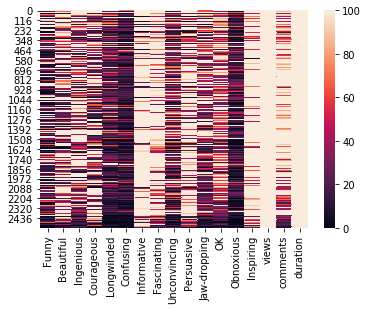

In [85]:
sns.heatmap(ted_data[['Funny', 'Beautiful', 'Ingenious', 'Courageous', 'Longwinded', 'Confusing', 'Informative', 'Fascinating', 'Unconvincing', 'Persuasive', 'Jaw-dropping', 'OK', 'Obnoxious', 'Inspiring', 'views', 'comments', 'duration']
], vmin = 0, vmax = 100)

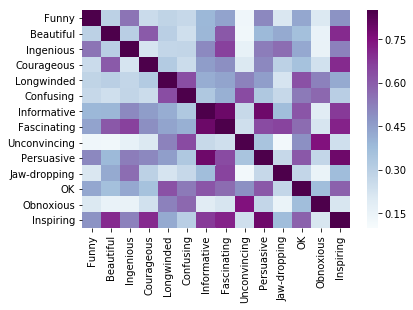

In [86]:
corr = ratingcats_df.corr()
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, vmin = 0.10, vmax=0.85, cmap="BuPu")

In [87]:
corrdf = ted_data[['Funny', 'Beautiful', 'Ingenious', 'Courageous', 'Longwinded', 'Confusing', 'Informative', 'Fascinating', 'Unconvincing', 'Persuasive', 'Jaw-dropping', 'OK', 'Obnoxious', 'Inspiring','views','comments','duration']]


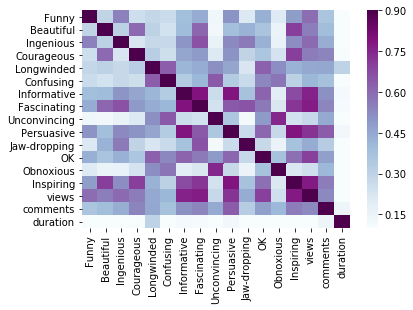

In [88]:
corr = corrdf.corr()
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, vmin = 0.10, vmax=0.90, cmap="BuPu")

In [89]:
 for tg in ted_data["tags"]:
   if len(tg) == 0:
      ted_data["top_tags"] = 0
   else:
      ted_data["top_tags"] = 1

In [90]:
ted_data["top_tags"].min()

1

In [91]:
for tg in ted_data["tags"]:
    print(tg)

['culture']
['culture', 'global issues', 'science', 'technology']
['entertainment', 'technology']
['business']
['global issues', 'health']
['business', 'culture', 'entertainment']
['culture']
['culture', 'design']
[]
['culture']
['culture', 'design', 'global issues']
['culture', 'entertainment', 'global issues']
['global issues', 'health', 'science', 'technology']
['design', 'technology']
['design', 'global issues', 'technology']
['entertainment']
['entertainment']
['design', 'global issues']
['design']
['business', 'culture', 'technology']
['business', 'culture', 'global issues', 'technology']
['culture', 'entertainment']
['business', 'culture', 'design', 'entertainment']
['culture', 'science']
['culture', 'entertainment', 'global issues']
['culture', 'global issues', 'science', 'technology']
['science']
['business', 'culture']
['business', 'culture']
['culture', 'science']
['business', 'culture']
['health', 'science', 'technology']
['science', 'technology']
['business', 'culture', 'g

['business', 'global issues']
['science']
['business', 'culture']
['culture', 'health', 'science']
['culture', 'design']
['entertainment', 'global issues']
['science']
['entertainment']
['global issues']
['science']
['culture', 'design']
['business', 'design', 'innovation', 'technology']
['business', 'global issues', 'technology']
['culture', 'entertainment']
['culture']
['design']
['business', 'technology']
['culture', 'science']
['design']
['culture', 'global issues']
['science', 'technology']
['global issues', 'technology']
['design', 'science', 'technology']
[]
['culture', 'global issues']
['culture', 'science']
[]
['business', 'science']
[]
[]
['culture', 'science']
['design']
['science']
['entertainment', 'technology']
['culture', 'global issues']
['culture', 'design']
['innovation', 'science']
['technology']
['technology']
['science', 'technology']
['culture', 'entertainment']
['business', 'technology']
['science', 'technology']
['design', 'science']
['design', 'technology']
['e

In [18]:
ted_datareplace

NameError: name 'ted_datareplace' is not defined

In [93]:
for ev in ted_data["event"]:
   if ev in topeventlist:
      ted_data["top_event"] = 1
   else:
      ted_data["top_event"] = 0

In [94]:
ted_data["top_event"].max()

0

In [95]:
type(ted_data["event"][1])

str

In [96]:
ted_data['top_tag'] = np.where(len(ted_data['tags'])==0, 0, 1)

In [97]:
ted_data["top_tags"].max()

1

In [19]:
ted_data['top_event'] = np.in1d(ted_data['event'], topeventlist)

In [20]:
ted_data['top_event'].replace(True,1).head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: top_event, dtype: float64

In [21]:
ted_data['tags'].replace([],0)

RecursionError: maximum recursion depth exceeded

In [ ]:
ted_data['top_tags'] = ted_data['tags'].apply(lambda y: 0 if len(y)==0 else 1 )

In [ ]:
ted_data['top_tags']

In [ ]:
plt.figure(figsize=(10,10))
plt.bar(range(len(tagcount)), tagcount.values(), align = 'center')
plt.xticks(range(len(tagcount)), tagcount.keys())
plt.show()

In [101]:
topspeakerdf["views"].sum()

4330658578

In [102]:
topspeakerdf["perc_views"] = topspeakerdf["views"]/topspeakerdf["views"].sum()

In [103]:
topspeakerdf.head()

,views,perc_views
main_speaker,,
Ken Robinson,63006281,0.014549
Amy Cuddy,43155405,0.009965
Simon Sinek,41113370,0.009494
Brené Brown,39157044,0.009042
Julian Treasure,30927659,0.007142


In [104]:
topspeakerdf[0:50]["perc_views"].sum()

0.2116260253476856

In [105]:
len(topspeakerdf)

2156

In [22]:
vals = topspeakerdf["perc_views"]

NameError: name 'topspeakerdf' is not defined

In [107]:
vals_split = np.array_split(vals, 43)

In [108]:
type(vals_split)

list

In [109]:
vals_split[1]

main_speaker
Philip Zimbardo          0.002220
Sheryl Sandberg          0.002209
Hyeonseo Lee             0.002206
Terry Moore              0.002199
Reggie Watts             0.002151
Benjamin Zander          0.002151
Dan Dennett              0.002128
Daniel Levitin           0.002116
Matthieu Ricard          0.002099
Amanda Palmer            0.002080
Meg Jay                  0.002069
Maysoon Zayid            0.002050
Matt Cutts               0.002041
Steve Jobs               0.002019
Tom Thum                 0.002006
Stephen Hawking          0.001999
Seth Godin               0.001965
Celeste Headlee          0.001950
Judson Brewer            0.001872
Andy Puddicombe          0.001855
Alain de Botton          0.001846
Tom Wujec                0.001845
Blaise Agüera y Arcas    0.001825
Yves Rossy               0.001824
Johann Hari              0.001811
David Pogue              0.001802
Michael Shermer          0.001800
Jamie Oliver             0.001764
Richard Dawkins          0.001750
H

In [110]:
ind = range(0,2101,50)
ls = [*ind]

In [111]:
print(ls)

[0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000, 1050, 1100, 1150, 1200, 1250, 1300, 1350, 1400, 1450, 1500, 1550, 1600, 1650, 1700, 1750, 1800, 1850, 1900, 1950, 2000, 2050, 2100]


In [112]:
vals2 = []
for start in ls:
    stop = start+50
    vals2.append (topspeakerdf[start:stop]["perc_views"].sum())

In [113]:
vals2

[0.2116260253476856,
 0.0922287272954354,
 0.062328261195934896,
 0.050250876184402826,
 0.0421053652038787,
 0.0366351667171302,
 0.03181845220955675,
 0.028820283278401637,
 0.026683531596565405,
 0.024756354274760837,
 0.022964224311104304,
 0.021248182543749813,
 0.019922517660084172,
 0.018774382818594018,
 0.018010250079797452,
 0.017249845873211204,
 0.016699122707890365,
 0.0161832390472967,
 0.015560427308291954,
 0.014802989625103622,
 0.014216908327239647,
 0.013812768871663286,
 0.013332692466988563,
 0.012846997517336957,
 0.01241633114952984,
 0.01201610518648464,
 0.011638431682434051,
 0.011223857555274587,
 0.010835155243678967,
 0.010372861815568412,
 0.00993995675823512,
 0.009500690543700487,
 0.00904094060864107,
 0.008593422300491498,
 0.008187093801417656,
 0.007704681955188756,
 0.007201854969228192,
 0.006554077512411093,
 0.005893044796846139,
 0.005232992532619827,
 0.004552889738333004,
 0.003711137858256717,
 0.00237230430775372]

Text(0,0.5,'Percentage of total Views')

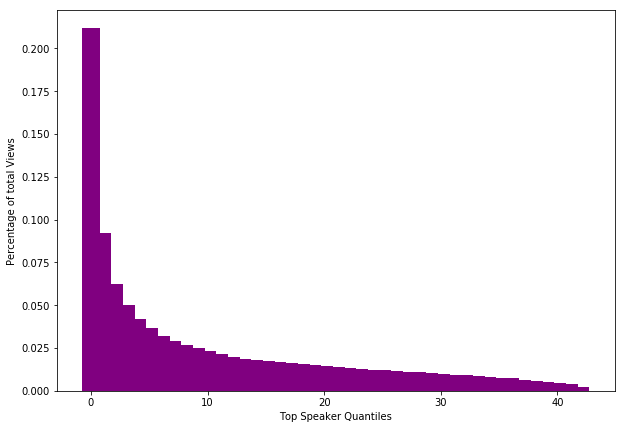

In [114]:
plt.figure(figsize=(10,7))
plt.bar(range(len(vals2)), vals2, width = 1.5, color="purple")
plt.xlabel("Top Speaker Quantiles")
plt.ylabel("Percentage of total Views")

In [115]:
transcripts = pd.read_csv("C:\\Users\\Neha\\transcripts.csv")

In [116]:
transcripts.head(n=1)

,transcript,url
0,Good morning. How are you?(Laughter)It's been ...,https://www.ted.com/talks/ken_robinson_says_sc...


In [117]:
transcripts["transcript"][9].count('Laughter')

2

In [118]:
transcripts["transcript"][1].count('?')

8

In [119]:
transcripts["transcript"][1].count('Applause')

6

In [120]:
len(transcripts)

2467

In [121]:
combined_t = pd.merge(ted_data,transcripts, on='url')

In [122]:
len(combined_t)

2467

In [123]:
combined_t["laughter_score"] = combined_t["transcript"].apply(lambda y: y.count('Laughter'))
combined_t["applause_score"] = combined_t["transcript"].apply(lambda y: y.count('Applause'))
combined_t["interaction_score"] = combined_t["transcript"].apply(lambda y: y.count('?'))

In [124]:
combined_t.head(n=5)

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,...,OK,Obnoxious,Inspiring,top_tags,top_event,top_tag,transcript,laughter_score,applause_score,interaction_score
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,...,1174.0,209.0,24924.0,1,True,1,Good morning. How are you?(Laughter)It's been ...,39,4,39
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,...,203.0,131.0,413.0,1,True,1,"Thank you so much, Chris. And it's truly a gre...",22,6,8
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,...,146.0,142.0,230.0,1,True,1,"(Music: ""The Sound of Silence,"" Simon & Garfun...",38,12,35
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,...,85.0,35.0,1070.0,1,True,1,If you're here today — and I'm very happy that...,10,7,12
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,...,248.0,61.0,2893.0,1,True,1,"About 10 years ago, I took on the task to teac...",10,4,22


array([[1.       , 0.4707835],
       [0.4707835, 1.       ]])

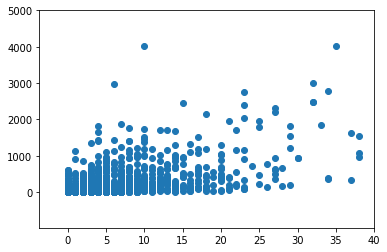

In [125]:
x = combined_t["laughter_score"]
y = combined_t["Funny"]
plt.scatter(x,y)
plt.ylim(ymax=5000)
plt.xlim(xmax=40)
np.corrcoef(x,y)

array([[1.        , 0.53038317],
       [0.53038317, 1.        ]])

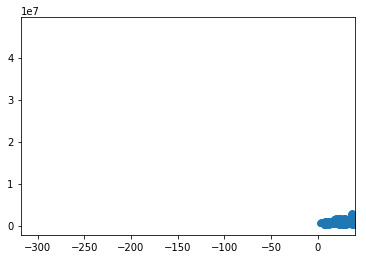

In [126]:
x = combined_t["comments"]
y = combined_t["views"]
plt.scatter(x,y)
plt.xlim(xmax=40)
np.corrcoef(x,y)

In [127]:
np.corrcoef(x,y)

array([[1.        , 0.53038317],
       [0.53038317, 1.        ]])

In [128]:
from wordcloud import WordCloud

ModuleNotFoundError: No module named 'wordcloud'

In [129]:
import xgboost

ModuleNotFoundError: No module named 'xgboost'

In [130]:
!pip3 install xgboost

  Using cached xgboost-0.7.post3.tar.gz


No files/directories in C:\Users\Neha\AppData\Local\Temp\pip-build-tvvor6ii\xgboost\pip-egg-info (from PKG-INFO)


In [133]:
from sklearn import ensemble
tedtalks_df = combined_t 
tedtalks_df2 = tedtalks_df[['Funny', 'Beautiful','Ingenious', 'Courageous','Longwinded','Confusing', 
                                                 'Informative','Fascinating', 'Unconvincing','OK','Inspiring', 
                                                  'comments','languages', 'top_tags', 'top_event', 'top_speaker']]
for c in tedtalks_df2.columns:
    tedtalks_df2[c]=tedtalks_df2[c].fillna(-1)
    if tedtalks_df2[c].dtype == 'object':
        lbl = LabelEncoder()
        lbl.fit(list(tedtalks_df2[c].values))
        tedtalks_df2[c] = lbl.transform(list(tedtalks_df2[c].values))

from sklearn.model_selection import train_test_split
xtrain, xtest = train_test_split(tedtalks_df2, test_size=0.2)
ydf = tedtalksdf['views']
ytrain, ytest = train_test_split(ydf, test_size=0.2)

params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(x_train, y_train)
mse = mean_squared_error(y_test, clf.predict(x_test))
print("MSE: %.4f" % mse)




KeyError: "['top_speaker'] not in index"